In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
reg = pd.read_csv("../../data/Registered_Voter_List.csv")

/var/folders/ym/cg59ddhx7jl408c4hs61x_wm0000gp/T/ipykernel_70735/1683269546.py:1: DtypeWarning: Columns (18,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  reg = pd.read_csv("../../data/Registered_Voter_List.csv")


In [3]:
pcts = gpd.read_file("../../data/precincts_march24.geojson")

In [4]:
reg = reg.dropna(subset=["SUSIND"])

In [5]:
suspended = pd.pivot_table(reg, index="PCTCOD", values=["VUIDNO"], aggfunc="count")

In [6]:
pcts["Precinct"] = pcts["Precinct"].astype(int)

In [7]:
pcts = pcts.merge(suspended, left_on= "Precinct", right_on = "PCTCOD", how="left")

In [8]:
pcts["pct_suspended"] = pcts["VUIDNO"]/pcts["VoterCount"]

In [9]:
pcts.explore("pct_suspended")

In [10]:
from pygris.utils import erase_water
pcts = erase_water(pcts)
outline = pcts.unary_union
outline = gpd.GeoDataFrame(geometry=[outline], crs=pcts.crs)

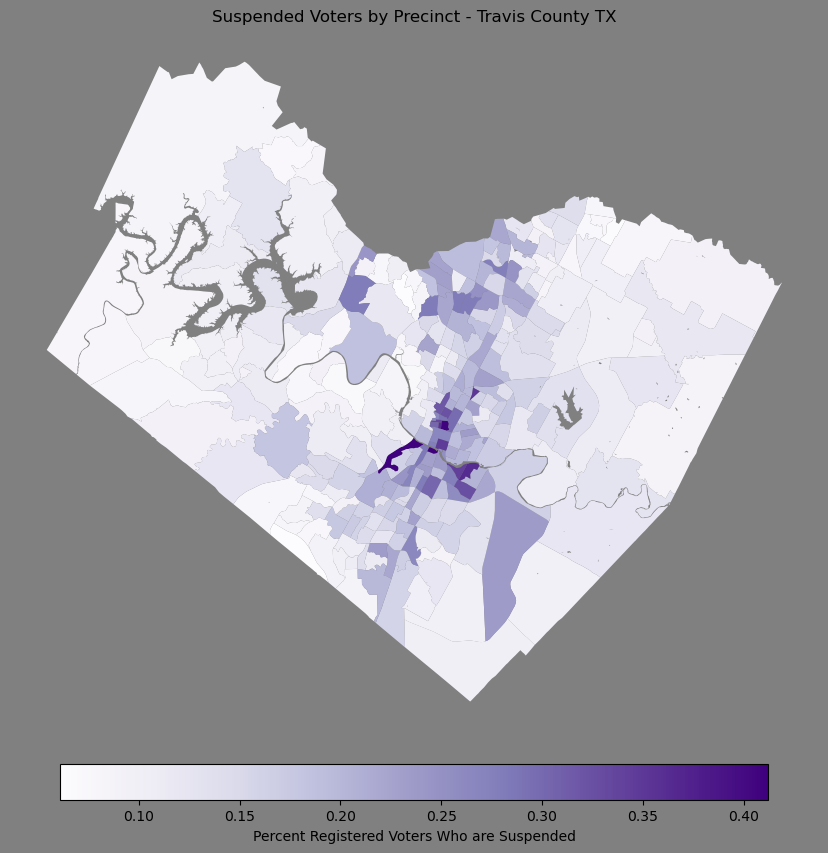

In [12]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='grey')
pct_plot = pcts.plot("pct_suspended", ax=ax, cmap="Purples")
# outline.plot(ax=ax, color="white", edgecolor="black", alpha=0.5, legend=None)


# Customize the legend (colorbar)
cbar = plt.colorbar(pct_plot.collections[0], ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Percent Registered Voters Who are Suspended')

# Turn off x and y axes
ax.set_axis_off()
plt.title('Suspended Voters by Precinct - Travis County TX')
plt.savefig("suspended_voters_by_pct.png", bbox_inches='tight', dpi=300)